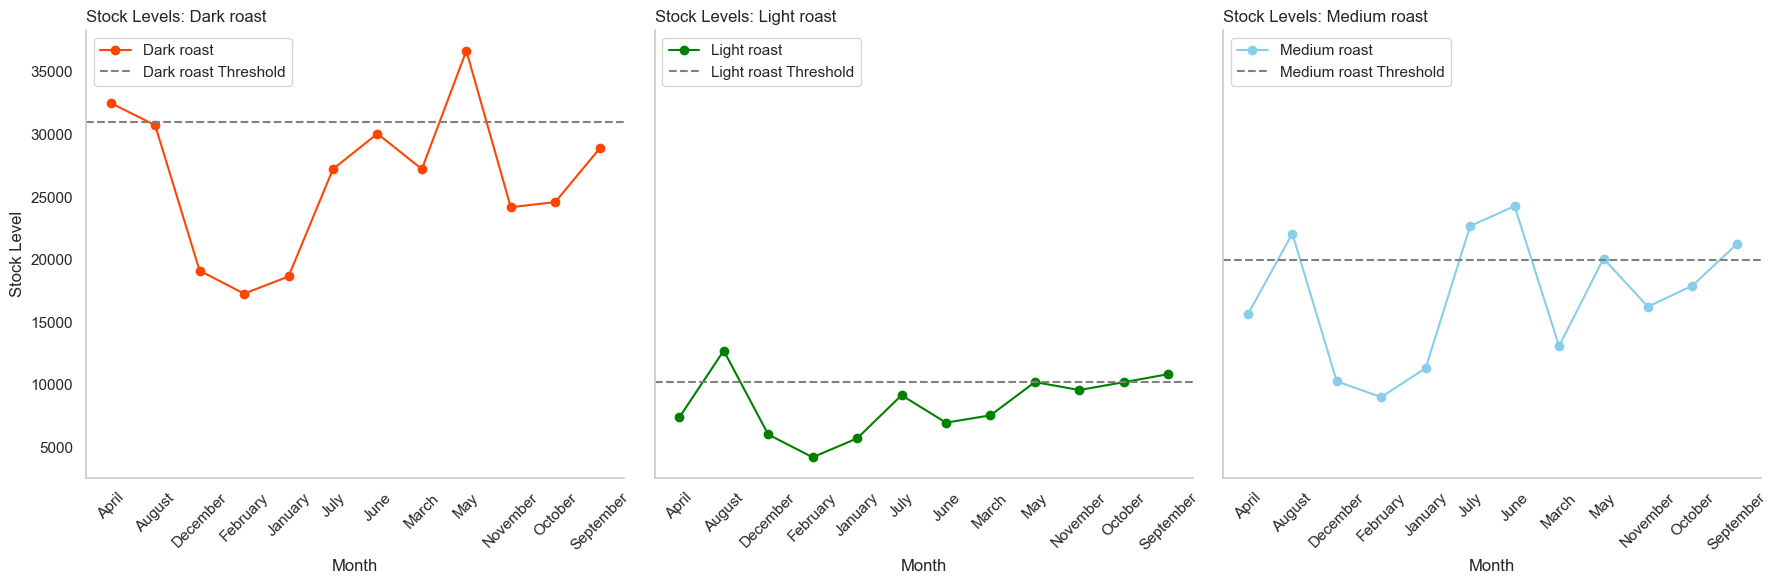

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the specified sheet
source_file = 'Bean there done that data.xlsx'
bean_data = pd.read_excel(source_file, sheet_name='Inventory (finished product)')

# Ensure the month column is recognized as categorical with the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Check for the 'Month' and 'Stock level' columns
if 'Month' in bean_data.columns and 'Stock level' in bean_data.columns:
    # Group and aggregate stock data by month and product type
    stock_levels = bean_data.groupby(['Month', 'Product'])['Stock level'].sum().reset_index()

    # Ensure that months are in the correct order
    stock_levels['Month'] = pd.Categorical(stock_levels['Month'], categories=month_order, ordered=True)

    # Create a figure with 3 subplots (1 row, 3 columns)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Define colors for each product type
    colors = {'Dark roast': 'orangered', 'Medium roast': 'skyblue', 'Light roast': 'green'}

    # Thresholds for each product
    thresholds = {'Dark roast': 31000, 'Medium roast': 20000, 'Light roast': 10200}

    # Plot lines for each product type in separate subplots
    for ax, product in zip(axes, stock_levels['Product'].unique()):
        product_data = stock_levels[stock_levels['Product'] == product]
        ax.plot(product_data['Month'], product_data['Stock level'], marker='o', color=colors[product], label=product)
        
        # Draw the horizontal line for the stock level threshold
        ax.axhline(y=thresholds[product], color='gray', linestyle='--', label=f'{product} Threshold')

        # Disable the grid for each subplot
        ax.grid(False)

        # Remove the northern (top) and eastern (right) spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Set labels and title for each subplot, move title to top-left with loc='left'
        ax.set_xlabel('Month')
        ax.set_title(f'Stock Levels: {product}', loc='left')  # Move title to the top-left corner
        ax.tick_params(axis='x', rotation=45)  # Rotate month labels for better readability

        # Move the legend to the top-left corner of each plot
        ax.legend(loc='upper left')

    # Set a common y-label for all subplots
    axes[0].set_ylabel('Stock Level')

    # Show the combined plot
    plt.tight_layout()
    plt.show()
else:
    print("The required columns 'Month' and 'Stock level' are not found in the data.")
